In [13]:
from keras.applications import VGG19
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard 
import time 
 
vgg_conv = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

In [14]:
import keras
import numpy as np
from random import shuffle
train_dir = 'C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/train'
validation_dir = 'C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/validation'
 
nTrain = 160
nValidation = 40

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size = 10
 
train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,3))

validation_features = np.zeros(shape=(nValidation, 7, 7, 512))
validation_labels = np.zeros(shape=(nValidation,3))


 
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=shuffle)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=shuffle)

Found 160 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [15]:
import keras
nImages=160
i = 0
for inputs_batch, labels_batch in train_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    train_features[i * batch_size : (i + 1) * batch_size] = features_batch
    train_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nImages:
        break
         
train_features = np.reshape(train_features, (nTrain, 7 * 7 * 512))

In [16]:
import keras
nValid=40
i = 0
for inputs_batch, labels_batch in validation_generator:
    features_batch = vgg_conv.predict(inputs_batch)
    validation_features[i * batch_size : (i + 1) * batch_size] = features_batch
    validation_labels[i * batch_size : (i + 1) * batch_size] = labels_batch
    i += 1
    if i * batch_size >= nValid:
        break
         
validation_features = np.reshape(validation_features, (nValidation, 7 * 7 * 512))

In [17]:
from keras import models
from keras import layers
from keras import optimizers
 
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=7 * 7 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))

In [18]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
              metrics=['acc'])
 
history = model.fit(train_features,
                    train_labels,
                    epochs=30,
                    batch_size=batch_size,
                    validation_data=(validation_features,validation_labels))

Train on 160 samples, validate on 40 samples
Epoch 1/30
160/160 [==============================] - 5s 34ms/step - loss: 2.3136 - acc: 0.4688 - val_loss: 0.9184 - val_acc: 0.6250
Epoch 2/30
160/160 [==============================] - 2s 13ms/step - loss: 1.2159 - acc: 0.6063 - val_loss: 0.9073 - val_acc: 0.6250
Epoch 3/30
160/160 [==============================] - 2s 13ms/step - loss: 0.8356 - acc: 0.6188 - val_loss: 1.1046 - val_acc: 0.6000
Epoch 4/30
160/160 [==============================] - 2s 13ms/step - loss: 0.7316 - acc: 0.6750 - val_loss: 0.6882 - val_acc: 0.7000
Epoch 5/30
160/160 [==============================] - 2s 13ms/step - loss: 0.6940 - acc: 0.7000 - val_loss: 0.6546 - val_acc: 0.7500
Epoch 6/30
160/160 [==============================] - 2s 13ms/step - loss: 0.6754 - acc: 0.7125 - val_loss: 0.7307 - val_acc: 0.7500
Epoch 7/30
160/160 [==============================] - 2s 13ms/step - loss: 0.6361 - acc: 0.7500 - val_loss: 0.7244 - val_acc: 0.7000
Epoch 8/30
160/160 [====

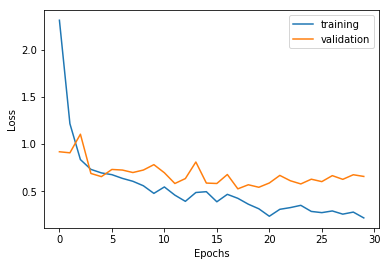

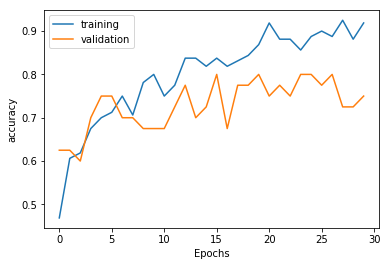

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'])
    plt.show()
    
plot_history(history)

In [21]:
from sklearn.metrics import classification_report, confusion_matrix
y_predict = model.predict(validation_features)
y_pred = model.predict_classes(validation_features)
target_names = ['class 0(Normal)', 'class 1(DR1)', 'class 2(DR2)']
print(classification_report(np.argmax(validation_labels, axis=1), y_pred, target_names=target_names))
print(confusion_matrix(np.argmax(validation_labels, axis=1), y_pred))

                 precision    recall  f1-score   support

class 0(Normal)       0.60      0.43      0.50         7
   class 1(DR1)       0.85      0.74      0.79        23
   class 2(DR2)       0.67      1.00      0.80        10

      micro avg       0.75      0.75      0.75        40
      macro avg       0.71      0.72      0.70        40
   weighted avg       0.76      0.75      0.74        40

[[ 3  3  1]
 [ 2 17  4]
 [ 0  0 10]]
